In [111]:
#For Your Beter Understanding I have added the comments, so you can read the comments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [3]:
df = pd.read_csv("my csv file.csv")

In [8]:
fill_price = []
fill_time = []
exit_price = []
exit_time = []
for i in range(len(df['Status'])):
    if df['Status'][i] == 'Filled':
        if df['B/S'][i] == 'Buy':
            if i == 11:
                fill_price.pop()
                fill_time.pop()
            if i == 22:
                fill_price.pop()
                fill_time.pop()
            if i == 33:
                fill_price.pop()
                fill_time.pop()
            fill_price.append(df['avgPrice'][i])
            fill_time.append(df['Fill Time'][i])
        else:
            if i != 0:
                if df['B/S'][i-1] == 'Sell' and df['Status'][i-1] == 'Filled':
                    if len(exit_price)> 0:
                        exit_price.pop()
            exit_price.append(df['avgPrice'][i])
            exit_time.append(df['Fill Time'][i])

In [9]:
# Filled and exit prices
filled_prices = fill_price
exit_prices = exit_price
profit_list = []
for i in range(len(exit_price)):
    profit = exit_price[i] - fill_price[i]
    profit_list.append(profit)
    
total_profit = sum(profit_list)

In [10]:
print(f"total_profit = {total_profit}")

total_profit = -94.1666699999987


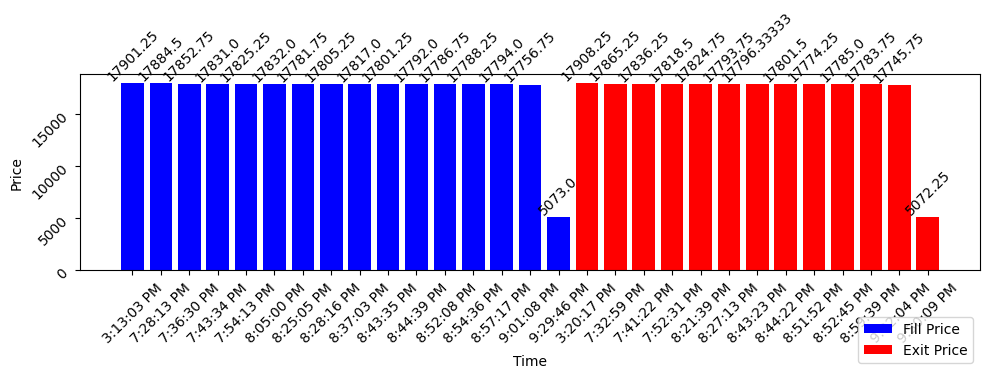

In [7]:

# Sample fill and exit prices and times
fill_prices = fill_price
fill_times = fill_time

exit_prices = exit_price
exit_times = exit_time

# Plotting
plt.figure(figsize=(10, 4))

# Plot fill prices
plt.bar(fill_times, fill_prices, color='blue', label='Fill Price')

# Plot exit prices
plt.bar(exit_times, exit_prices, color='red', label='Exit Price')

# Add the numeric values of the fill and exit prices on top of the bars
for i in range(len(fill_prices)):
    plt.text(fill_times[i], fill_prices[i], str(fill_prices[i]), ha='center', va='bottom', rotation=45)
for i in range(len(exit_prices)):
    plt.text(exit_times[i], exit_prices[i], str(exit_prices[i]), ha='center', va='bottom', rotation=45)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation = 45)
plt.legend(bbox_to_anchor=(1, -0.2), loc='upper right')  # Adjust the legend position

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
